<a href="https://colab.research.google.com/github/harshitaatray/Heart-disease-prediction/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Matt: Knn

Harshita: Logistic


Kevin: Neural Network

Le: Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
confusion_matrix([1,1,0,0,1], [0,1,1,0,1])

array([[1, 1],
       [1, 2]])

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Exploratory Data Analysis

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

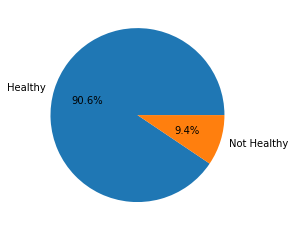

In [ ]:
plt.pie(heart_df['HeartDiseaseorAttack'].value_counts(),  labels=['Healthy', 'Not Healthy'], autopct='%1.1f%%')

heart_df['HeartDiseaseorAttack'].value_counts()

In [ ]:
round(heart_df.describe(),3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000
mean,0.094,0.429,0.424,0.963,28.382,0.443,0.041,0.297,0.757,0.634,0.811,0.056,0.951,0.084,2.511,3.185,4.242,0.168,0.440,8.032,5.050,6.054
std,0.292,0.495,0.494,0.190,6.609,0.497,0.197,0.698,0.429,0.482,0.391,0.230,0.216,0.278,1.068,7.413,8.718,0.374,0.496,3.054,0.986,2.071
min,0.000,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,6.000,4.000,5.000
50%,0.000,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,8.000,5.000,7.000
75%,0.000,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.000,3.000,0.000,1.000,10.000,6.000,8.000
max,1.000,1.000,1.000,1.000,98.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.000,30.000,1.000,1.000,13.000,6.000,8.000


0.0    141257
1.0    112423
Name: Smoker, dtype: int64

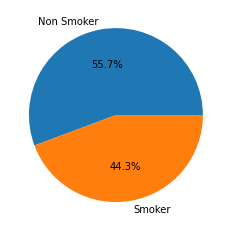

In [ ]:
plt.pie(heart_df['Smoker'].value_counts(),  labels=['Non Smoker', 'Smoker'], autopct='%1.1f%%')
heart_df['Smoker'].value_counts()

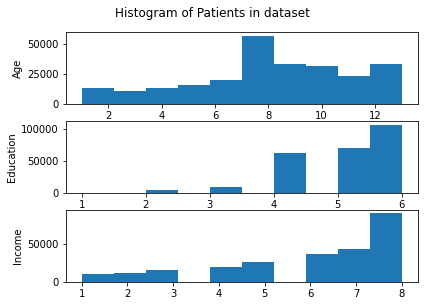

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.suptitle('Histogram of Patients in dataset', y = 1.05)
ax1.hist(heart_df['Age'])
ax1.set_ylabel("Age")
ax2.hist(heart_df['Education'])
ax2.set_ylabel('Education')
ax3.hist(heart_df['Income'])
ax3.set_ylabel('Income')
fig.tight_layout(h_pad = 0, w_pad=5, pad = 1.08)
plt.show()

In [ ]:
heart_df['Age'].mean()

8.032119205298013

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000

Text(0, 0.5, 'Number of Responses')

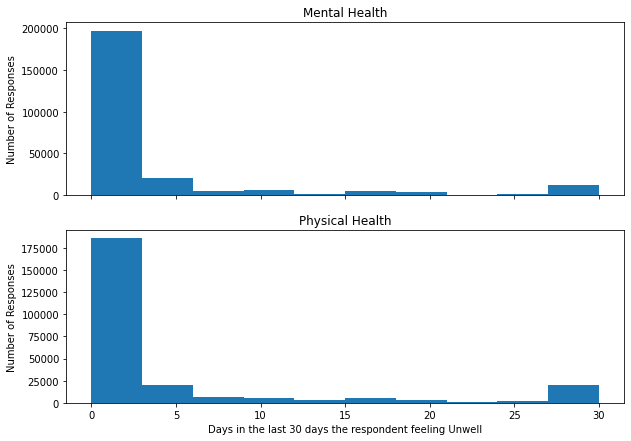

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7), sharex = True)
ax1.hist(heart_df['MentHlth'])
ax2.hist(heart_df['PhysHlth'])
ax1.title.set_text('Mental Health')
ax2.title.set_text('Physical Health')
ax2.set_xlabel('Days in the last 30 days the respondent feeling Unwell')
ax1.set_ylabel('Number of Responses')
ax2.set_ylabel('Number of Responses')


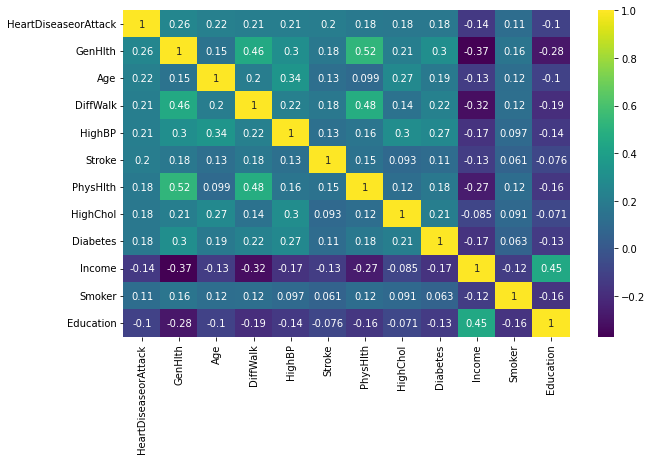

In [ ]:
k = 12 #number of variables for heatmap
cols = np.abs(heart_df.corr()).nlargest(k, 'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = heart_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Data Preprocessing

In [ ]:
def entropy(arr):
  arr = pd.DataFrame(arr)
  temp = np.array(arr.value_counts()/arr.shape[0])
  dist_vals = temp.shape[0]
  ent = -sum(temp*np.log2(temp))
  return (ent, dist_vals)

In [ ]:
e_test = [0,0,0,0,1,1,1,1,3,3,3,3,4,4,4,4]
entropy(e_test)

(2.0, 4)

In [ ]:
variable = heart_df.columns
entropy_values = []
dist_values = []

for i in variable:
  out = entropy(heart_df[i])
  entropy_values.append(out[0])
  dist_values.append(out[1])


entropy_df = pd.DataFrame({'variables': variable, 'Entropy': entropy_values, 'Max bits': np.log2(dist_values), 'ratio': entropy_values/np.log2(dist_values)})
print(entropy_df)

               variables   Entropy  Max bits     ratio
0   HeartDiseaseorAttack  0.450289  1.000000  0.450289
1                 HighBP  0.985406  1.000000  0.985406
2               HighChol  0.983323  1.000000  0.983323
3              CholCheck  0.229916  1.000000  0.229916
4                    BMI  4.529840  6.392317  0.708638
5                 Smoker  0.990661  1.000000  0.990661
6                 Stroke  0.244903  1.000000  0.244903
7               Diabetes  0.710027  1.584963  0.447977
8           PhysActivity  0.800741  1.000000  0.800741
9                 Fruits  0.947348  1.000000  0.947348
10               Veggies  0.698492  1.000000  0.698492
11     HvyAlcoholConsump  0.312159  1.000000  0.312159
12         AnyHealthcare  0.281909  1.000000  0.281909
13           NoDocbcCost  0.416728  1.000000  0.416728
14               GenHlth  2.077863  2.321928  0.894887
15              MentHlth  1.985370  4.954196  0.400745
16              PhysHlth  2.269090  4.954196  0.458014
17        

In [ ]:
y = heart_df['HeartDiseaseorAttack']
X = heart_df.drop('HeartDiseaseorAttack', axis = 1)

for i in X.columns:
  X[i]= (X[i]-min(X[i]))/(max(X[i]-min(X[i])))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state=6000, stratify=y)

#deal with the imbalanced data
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)
from collections import Counter
print('before', Counter(y_train))
print('after:', Counter(y_train_under))

before Counter({0.0: 153957, 1.0: 16008})
after: Counter({0.0: 16008, 1.0: 16008})


In [ ]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.148461,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.349080,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000,169965.000000
mean,0.428935,0.424523,0.962628,0.190638,0.442044,0.040414,0.148872,0.756162,0.634089,0.811602,0.056106,0.951090,0.084047,0.378057,0.106493,0.141076,0.168423,0.440791,0.586070,0.810382,0.721869
std,0.494926,0.494272,0.189673,0.077072,0.496631,0.196929,0.349554,0.429398,0.481686,0.391030,0.230126,0.215681,0.277459,0.266337,0.247379,0.290419,0.374243,0.496483,0.254191,0.197197,0.295847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KNN Algorithm

In [ ]:
neighbors = range(1,16)
train_scores = []
test_scores = []
precisions = []
recalls = []
fscores = []


for i in neighbors:
    start = datetime.now()

    heart_knn = KNeighborsClassifier(n_neighbors = i)
    heart_knn.fit(X_train_under, y_train_under)

    train_score = heart_knn.score(X_train_under, y_train_under)

    knn_pred = heart_knn.predict(X_test)

    test_score = accuracy_score(y_test, knn_pred)
    recall = recall_score(y_test, knn_pred)
    precision = precision_score(y_test, knn_pred)
    fscore = f1_score(y_test, knn_pred)

    recalls.append(recall)
    precisions.append(precision)
    fscores.append(fscore)

    train_scores.append(train_score)
    test_scores.append(test_score)

    iteration = [i, train_score, test_score, recall, precision, fscore, datetime.now() - start]
    print(iteration)

[1, 0.9968453273363318, 0.6836887057277669, 0.6727964489537096, 0.18164697825714776, 0.2860609328660016, datetime.timedelta(seconds=42, microseconds=563125)]
[2, 0.8411731634182908, 0.797527324852177, 0.4914394419784401, 0.2304490038655962, 0.31376518218623484, datetime.timedelta(seconds=47, microseconds=581150)]
[3, 0.8410169915042479, 0.7064564295526489, 0.7301204819277108, 0.20412722050845655, 0.319053424961206, datetime.timedelta(seconds=51, microseconds=368129)]
[4, 0.8086894052973513, 0.7726930657588246, 0.6129359543436905, 0.23224411340701587, 0.33685311029796133, datetime.timedelta(seconds=54, microseconds=708305)]
[5, 0.8097826086956522, 0.7149973123096219, 0.7500317057704502, 0.2127185094597511, 0.33143721803457843, datetime.timedelta(seconds=56, microseconds=676566)]
[6, 0.7959770114942529, 0.7607597204802007, 0.6766011414077362, 0.2338578880462894, 0.34757964688253307, datetime.timedelta(seconds=58, microseconds=459484)]
[7, 0.7931659170414792, 0.7190109299408708, 0.7620798

In [ ]:
heart_knn_df = pd.DataFrame({'k':neighbors, 'train_score':train_scores, 'test_score':test_scores, 'recalls':recall, 'precision':precisions, 'f1_scores':fscores})

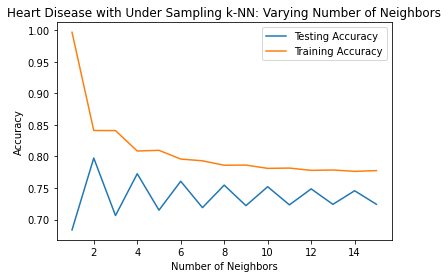

In [ ]:
plt.title('Heart Disease with Under Sampling k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_scores, label = 'Testing Accuracy')
plt.plot(neighbors, train_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

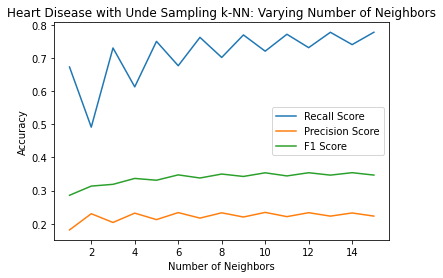

In [ ]:
plt.title('Heart Disease with Unde Sampling k-NN: Varying Number of Neighbors')
plt.plot(neighbors, recalls, label = 'Recall Score')
plt.plot(neighbors, precisions, label = 'Precision Score')
plt.plot(neighbors, fscores, label = 'F1 Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
heart_knn_df

,k,train_score,test_score,recalls,precision,f1_scores
0,2,0.841173,0.797527,0.232782,0.491439,0.313765
1,4,0.808689,0.772693,0.232782,0.612936,0.336853
2,6,0.795977,0.760760,0.232782,0.676601,0.347580
3,8,0.786138,0.754644,0.232782,0.701585,0.350082
4,10,0.781203,0.752123,0.232782,0.720482,0.353813
5,12,0.778017,0.748695,0.232782,0.731135,0.354028
6,14,0.776456,0.745733,0.232782,0.740266,0.354187


In [ ]:
neighbors = range(1,8)
train_scores = []
test_scores = []
precisions = []
recalls = []
fscores = []


for i in neighbors:
    start = datetime.now()

    heart_knn = KNeighborsClassifier(n_neighbors = i*2)
    heart_knn.fit(X_train, y_train)

    train_score = heart_knn.score(X_train, y_train)
    test_score = heart_knn.score(X_test, y_test)

    knn_pred = heart_knn.predict(X_test)

    recall = recall_score(knn_pred, y_test)
    precision = precision_score(knn_pred, y_test)
    fscore = f1_score(knn_pred, y_test)

    recalls.append(recall)
    precisions.append(precision)
    fscores.append(fscore)

    train_scores.append(train_score)
    test_scores.append(test_score)

    iteration = [i*2, train_score, test_score, recall, precision, fscore, datetime.now() - start]
    print(iteration)

[2, 0.9297737769540788, 0.8992653646299946, 0.35714285714285715, 0.08687381103360811, 0.1397531367948587, datetime.timedelta(seconds=769, microseconds=926235)]
[4, 0.9190068543523666, 0.9016185868721257, 0.40145985401459855, 0.09067850348763475, 0.1479412373267122, datetime.timedelta(seconds=819, microseconds=497463)]
[6, 0.9150589827317389, 0.9025981006987995, 0.4165114835505897, 0.08509828788839569, 0.14132266217354675, datetime.timedelta(seconds=846, microseconds=630031)]
[8, 0.9131174065248727, 0.9035059427820582, 0.43562374916611074, 0.08281547241597971, 0.13917306052855927, datetime.timedelta(seconds=887, microseconds=108773)]
[10, 0.9121172006001236, 0.9042226602162098, 0.4523979957050823, 0.08015218769816107, 0.13617754794225384, datetime.timedelta(seconds=922, microseconds=935092)]
[12, 0.9113052687317977, 0.9047601982918234, 0.4662058371735791, 0.07698161065313887, 0.13214324589093282, datetime.timedelta(seconds=940, microseconds=73496)]
[14, 0.9106933780484218, 0.90486770590

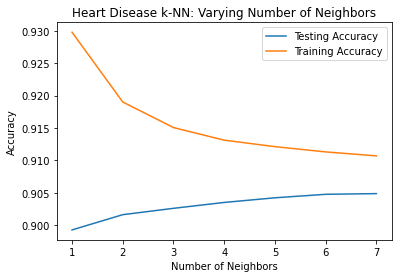

In [ ]:
plt.title('Heart Disease k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_scores, label = 'Testing Accuracy')
plt.plot(neighbors, train_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

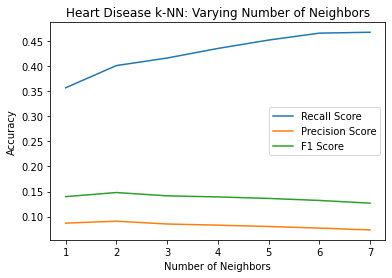

In [ ]:
plt.title('Heart Disease k-NN: Varying Number of Neighbors')
plt.plot(neighbors, recalls, label = 'Recall Score')
plt.plot(neighbors, precisions, label = 'Precision Score')
plt.plot(neighbors, fscores, label = 'F1 Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
heart_knn = KNeighborsClassifier(n_neighbors=14)

heart_knn.fit(X_train_under, y_train_under)

knn_pred = heart_knn.predict(X_test)

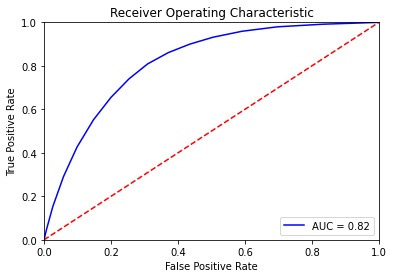

In [ ]:
knn_pred_prob = heart_knn.predict_proba(X_test)
roc_auc_score(y_test, knn_pred_prob[:,1])

knn_pred = knn_pred_prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, knn_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(confusion_matrix(y_test, knn_pred))

print(f'Accuracy: {accuracy_score(y_test, knn_pred): 0.2f}')
print(f'Precision: {precision_score(y_test, knn_pred): 0.2f}')
print(f'Recall: {recall_score(y_test, knn_pred): 0.2f}')
print(f'fscore: {f1_score(y_test, knn_pred): 0.2f}')
print(classification_report(y_test, knn_pred))

[[56592 19238]
 [ 2048  5837]]
Accuracy:  0.75
Precision:  0.23
Recall:  0.74
fscore:  0.35
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     75830
         1.0       0.23      0.74      0.35      7885

    accuracy                           0.75     83715
   macro avg       0.60      0.74      0.60     83715
weighted avg       0.90      0.75      0.80     83715



Logistic Regression

In [ ]:
min_max = MinMaxScaler()
X_norm = min_max.fit_transform(X)
X_norm = pd.DataFrame(data = X_norm, columns = X.columns)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X,y, test_size = .33, random_state=6000, stratify=y)

logistic = LogisticRegression()
logistic.fit(X_train_norm, y_train_norm)
predictions = logistic.predict(X_test_norm)
print(confusion_matrix(y_test_norm, predictions))

[[74787  1043]
 [ 6805  1080]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


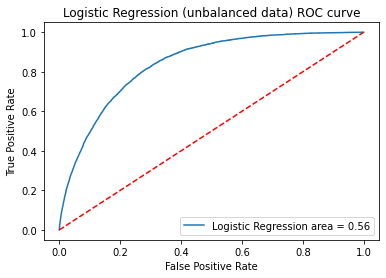

In [ ]:
logistic_roc_auc = roc_auc_score(y_test_norm, predictions)
fp, tp, threshold = roc_curve(y_test_norm, logistic.predict_proba(X_test_norm)[:,1])
plt.figure()
plt.plot(fp, tp, label = 'Logistic Regression area = %0.2f' % logistic_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (unbalanced data) ROC curve')
plt.legend(loc = 'lower right')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     75830
         1.0       0.51      0.14      0.22      7885

    accuracy                           0.91     83715
   macro avg       0.71      0.56      0.58     83715
weighted avg       0.88      0.91      0.88     83715



In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions): 0.2f}')
print(f'Precision: {precision_score(y_test, predictions): 0.2f}')
print(f'Recall: {recall_score(y_test, predictions): 0.2f}')
print(f'fscore: {f1_score(y_test, predictions): 0.2f}')

Accuracy:  0.91
Precision:  0.51
Recall:  0.14
fscore:  0.22


In [ ]:
from collections import Counter
Counter(y_train)

Counter({0.0: 153957, 1.0: 16008})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 'not minority', random_state = 0)
X_resample_train, y_resample_train = rus.fit_resample(X_train_norm,y_train_norm)
Counter(y_resample_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 16008, 1.0: 16008})

In [ ]:
logistic1 = LogisticRegression()
logistic1.fit(X_resample_train, y_resample_train)
predictions1 = logistic1.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


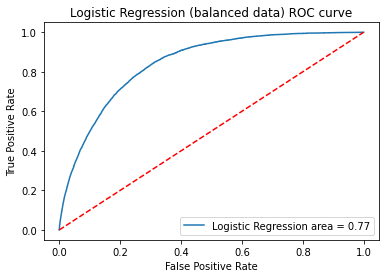

In [ ]:
logistic_roc_auc1 = roc_auc_score(y_test_norm, predictions1)
fp1, tp1, threshold1 = roc_curve(y_test_norm, logistic1.predict_proba(X_test_norm)[:,1])
plt.figure()
plt.plot(fp1, tp1, label = 'Logistic Regression area = %0.2f' % logistic_roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (balanced data) ROC curve')
plt.legend(loc = 'lower right')

In [ ]:
confusion_matrix(y_test_norm, predictions1)

array([[56029, 19801],
       [ 1644,  6241]])

In [ ]:
print(classification_report(y_test_norm, predictions1))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     75830
         1.0       0.24      0.79      0.37      7885

    accuracy                           0.74     83715
   macro avg       0.61      0.77      0.60     83715
weighted avg       0.90      0.74      0.79     83715



In [ ]:
print(f'Accuracy: {accuracy_score(y_test_norm, predictions1): 0.2f}')
print(f'Precision: {precision_score(y_test_norm, predictions1): 0.2f}')
print(f'Recall: {recall_score(y_test_norm, predictions1): 0.2f}')
print(f'fscore: {f1_score(y_test_norm, predictions1): 0.2f}')

Accuracy:  0.74
Precision:  0.24
Recall:  0.79
fscore:  0.37


**Random Forest**

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.9028011706384758


In [ ]:
#Claasification reprot
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     75830
         1.0       0.44      0.11      0.18      7885

    accuracy                           0.90     83715
   macro avg       0.68      0.55      0.56     83715
weighted avg       0.87      0.90      0.88     83715



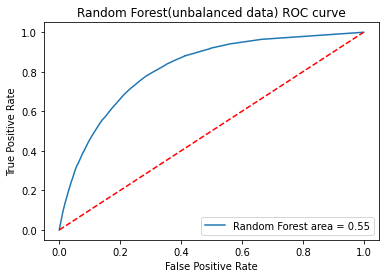

In [ ]:
RF_roc_auc = roc_auc_score(y_test, y_pred_RF)
fp, tp, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fp, tp, label = 'Random Forest area = %0.2f' % RF_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest(unbalanced data) ROC curve')
plt.legend(loc = 'lower right')

In [ ]:
#Create a Gaussian Classifier for undersample data
clf_under = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred_RF_under=clf_under.predict(X_test)
clf_under.fit(X_train_under,y_train_under)

# prediction on test set
y_pred_RF_under=clf_under.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF_under))

Accuracy: 0.7313743056799856


In [ ]:
#Claasification reprot
print(classification_report(y_test, y_pred_RF_under))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     75830
         1.0       0.23      0.79      0.36      7885

    accuracy                           0.73     83715
   macro avg       0.60      0.76      0.59     83715
weighted avg       0.90      0.73      0.79     83715



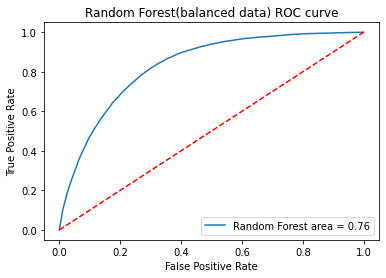

In [ ]:
RF_roc_auc_under = roc_auc_score(y_test, y_pred_RF_under)
fp, tp, threshold = roc_curve(y_test, clf_under.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fp, tp, label = 'Random Forest area = %0.2f' % RF_roc_auc_under)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest(balanced data) ROC curve')
plt.legend(loc = 'lower right')

Neural Network

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

from numpy import mean

In [ ]:
#import data
df = heart_df
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#check whether the data is imbanlanced or not
df['HeartDiseaseorAttack'].value_counts()/len(df)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
#define feature column X and respone data y
X = df.iloc[:,1:]
y = df.iloc[:,0]
#splite train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40)
print('before:', Counter(y_train))
#one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education',
       'Income']
enc_ohe = OneHotEncoder(handle_unknown ='ignore')
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

before: Counter({0.0: 137817, 1.0: 14391})


In [ ]:
#deal with the imbalanced data
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)
from collections import Counter
print('before', Counter(y_train))
print('after:', Counter(y_train_under))

before Counter({0.0: 137817, 1.0: 14391})
after: Counter({0.0: 14391, 1.0: 14391})


In [ ]:
X_test_under, y_test_under = undersample.fit_resample(X_test,y_test)
print('before', Counter(y_test))
print('after:', Counter(y_test_under))

before Counter({0.0: 91970, 1.0: 9502})
after: Counter({0.0: 9502, 1.0: 9502})


In [ ]:
# Scale the data, using standardization
# standardization (x-mean)/std
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
model = Sequential()

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=64,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=X_train_under,
          y=y_train_under,
          epochs=25,
          validation_data=(X_test_under, y_test_under), verbose=0
          )

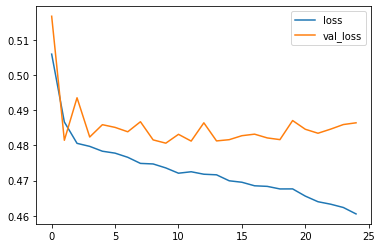

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
#Predict on test set
predictions_NN_model = model.predict(X_test_under)
predictions_NN_model = predictions_NN_model[:,0]

predictions_NN_Model01 = np.where(predictions_NN_model > 0.5, 1, 0) #Turn probability to 0-1 binary output

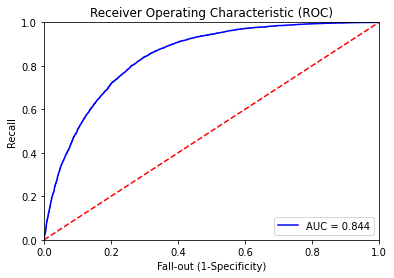

In [ ]:
#Print Area Under Curve
import matplotlib.pyplot as plt
predictions_NN_prob = model.predict(X_test_under)
predictions_NN_prob = predictions_NN_prob[:,0]
false_positive_rate, recall, thresholds = roc_curve(y_test_under, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
print(metrics.confusion_matrix(y_test_under, predictions_NN_Model01))
print(metrics.classification_report(y_test_under, predictions_NN_Model01))

[[6839 2663]
 [1705 7797]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      9502
         1.0       0.75      0.82      0.78      9502

    accuracy                           0.77     19004
   macro avg       0.77      0.77      0.77     19004
weighted avg       0.77      0.77      0.77     19004



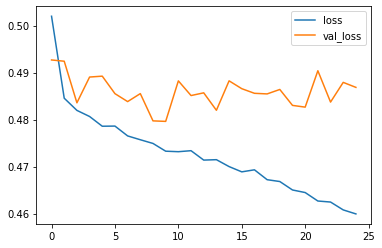

In [ ]:
model2 = Sequential()

model2.add(Dense(units=128,activation='relu'))

model2.add(Dense(units=64,activation='relu'))

model2.add(Dense(units=32,activation='relu'))

model2.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model2.compile(loss='binary_crossentropy', optimizer='adam')
model2.fit(x=X_train_under,
          y=y_train_under,
          epochs=25,
          validation_data=(X_test_under, y_test_under), verbose=0
          )
model_loss2 = pd.DataFrame(model2.history.history)
model_loss2.plot()

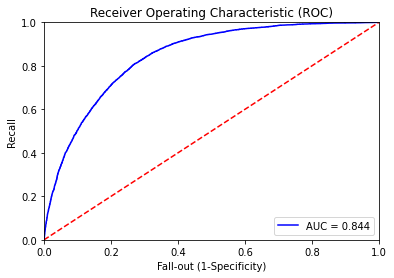

In [ ]:
#Predict on test set
predictions_NN_model2 = model2.predict(X_test_under)
predictions_NN_model2 = predictions_NN_model2[:,0]

predictions_NN_Model02 = np.where(predictions_NN_model2 > 0.5, 1, 0)
#Print Area Under Curve
import matplotlib.pyplot as plt
predictions_NN_prob = model2.predict(X_test_under)
predictions_NN_prob = predictions_NN_prob[:,0]
false_positive_rate, recall, thresholds = roc_curve(y_test_under, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [ ]:
print(metrics.confusion_matrix(y_test_under, predictions_NN_Model02))
print(metrics.classification_report(y_test_under, predictions_NN_Model02))

[[6785 2717]
 [1683 7819]]
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.76      9502
         1.0       0.74      0.82      0.78      9502

    accuracy                           0.77     19004
   macro avg       0.77      0.77      0.77     19004
weighted avg       0.77      0.77      0.77     19004

